In [21]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pygmo

In [2]:
# Local
from robustranking.benchmark import Benchmark
from robustranking.comparison import BootstrapComparison, SubSetComparison, AggregatedComparison
from robustranking.utils import *

## Read and process data
SAT competition 2016 - Main track

In [3]:
df = pd.read_csv("./Rundata/sc2016-detailed-results/main.csv")

df["solver"] = df["solver"] + df["configuration"]
df["solved"] = df["status"] == "complete"
df = df[["solver","benchmark", "cpu time", "solved"]]
df = df.rename(columns={"cpu time": "PAR2"})
df
#df[df["objective"] == "solved"].groupby("solver").sum()[0].reset_index().sort_values(0, ascending=False)

,solver,benchmark,PAR2,solved
0,GHackCOMSPS_DRUPghack_drup,sat/10pipe_k.cnf,543.341,True
1,Scavel_SATdefault,sat/10pipe_k.cnf,5000.020,False
2,Beans And Eggsdefault,sat/10pipe_k.cnf,1356.550,True
3,cmsat5_main2default,sat/10pipe_k.cnf,5000.020,False
4,cmsat5_autotune2default,sat/10pipe_k.cnf,1295.360,True
...,...,...,...,...
14495,MapleCOMSPS_LRB_DRUPLRB_VSIDS_drup,sat/sc16craft_tseitingrid7x200_shuffled.cnf,5000.020,False
14496,MapleCOMSPS_DRUPseq_LRB_VSIDS_drup,sat/sc16craft_tseitingrid7x200_shuffled.cnf,5000.020,False
14497,Riss6default_DRAT,sat/sc16craft_tseitingrid7x200_shuffled.cnf,5000.010,False
14498,Riss6blackbox_DRAT,sat/sc16craft_tseitingrid7x200_shuffled.cnf,5000.030,False


## Convert dataframe to Benchmark object
This object can transform to different data structures and perform checks on the benchmark

In [4]:
competition = Benchmark()

competition.from_pandas(df, "solver", "benchmark", ["PAR2", "solved"])
competition.show_stats()

algorithms       29
instances       500
objectives        2
values        29000
complete       True
dtype: object

## Make comparison

In [5]:
competition_filtered = competition.filter(objectives="solved")
# competition_filtered = competition.filter(objectives="PAR2")

comparison = BootstrapComparison(competition_filtered,
                                 alpha=0.05,
                                 minimise=False,
                                 bootstrap_runs=10000,
                                 aggregation_method=np.sum)

default_comparison = AggregatedComparison(competition,
                                          minimise={"PAR2": True, "solved": False},
                                          aggregation_method={"PAR2": np.mean, "solved": np.sum})

%time comparison.compute()
robust_ranks = comparison.get_ranking()
robust_ranks

CPU times: user 1.17 s, sys: 107 ms, total: 1.28 s
Wall time: 1.3 s


,group,ranked 1st,remaining
algorithm,,,
MapleCOMSPS_DRUPseq_LRB_VSIDS_drup,1,0.3688,0.6312
Riss6noPP_DRAT,1,0.2379,0.3933
Lingeling bbc maindefault,1,0.2090,0.1843
glucose_hack_kiel_newScriptmain_new,1,0.0491,0.1352
abcdSAT_drupdefault,1,0.0402,0.0950
tc_glucosedefault,1,0.0280,0.0670
MapleCOMSPS_LRB_DRUPLRB_VSIDS_drup,1,0.0261,0.0409
Riss6default_DRAT,1,0.0136,0.0273
Beans And Eggsdefault,1,0.0105,0.0168


In [59]:
combined_rank = robust_ranks.join(comparison.get_confidence_intervals()).join(default_comparison.get_ranking())
combined_rank

/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_86303/599395445.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  combined_rank = robust_ranks.join(comparison.get_confidence_intervals()).join(default_comparison.get_ranking())


,group,ranked 1st,remaining,median,lb,ub,"(PAR2, rank)","(PAR2, score)","(solved, rank)","(solved, score)"
algorithm,,,,,,,,,,
MapleCOMSPS_DRUPseq_LRB_VSIDS_drup,1,0.3688,0.6312,204.0,182.000,225.0,11,3412.773196,1,204.0
Riss6noPP_DRAT,1,0.2379,0.3933,203.0,181.000,224.0,5,3377.631526,2,203.0
Lingeling bbc maindefault,1,0.2090,0.1843,202.0,181.000,223.0,6,3385.744974,3,202.0
glucose_hack_kiel_newScriptmain_new,1,0.0491,0.1352,199.0,177.000,220.0,7,3404.174933,4,199.0
abcdSAT_drupdefault,1,0.0402,0.0950,198.0,177.000,219.0,10,3412.462534,6,198.0
tc_glucosedefault,1,0.0280,0.0670,198.0,176.000,219.0,1,3355.291960,5,198.0
MapleCOMSPS_LRB_DRUPLRB_VSIDS_drup,1,0.0261,0.0409,196.0,174.000,217.0,4,3368.455730,8,196.0
Riss6default_DRAT,1,0.0136,0.0273,196.0,174.975,218.0,3,3366.461532,7,196.0
Beans And Eggsdefault,1,0.0105,0.0168,195.0,173.000,216.0,8,3406.272323,9,195.0


In [60]:
combined_rank.reset_index().groupby("group")["rank"].agg(["mean","count"]).rename(columns={"mean": "frac. rank"})

KeyError: 'Column not found: rank'

## Plots


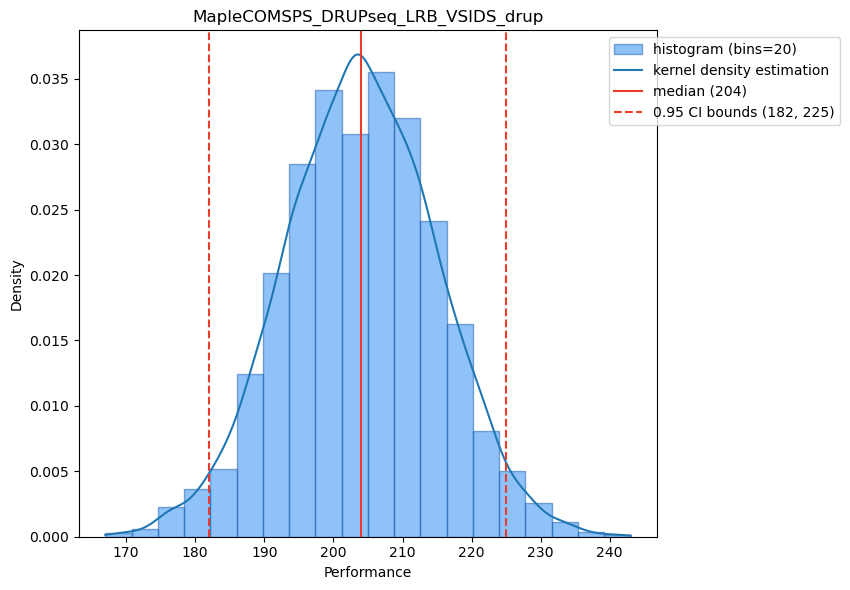

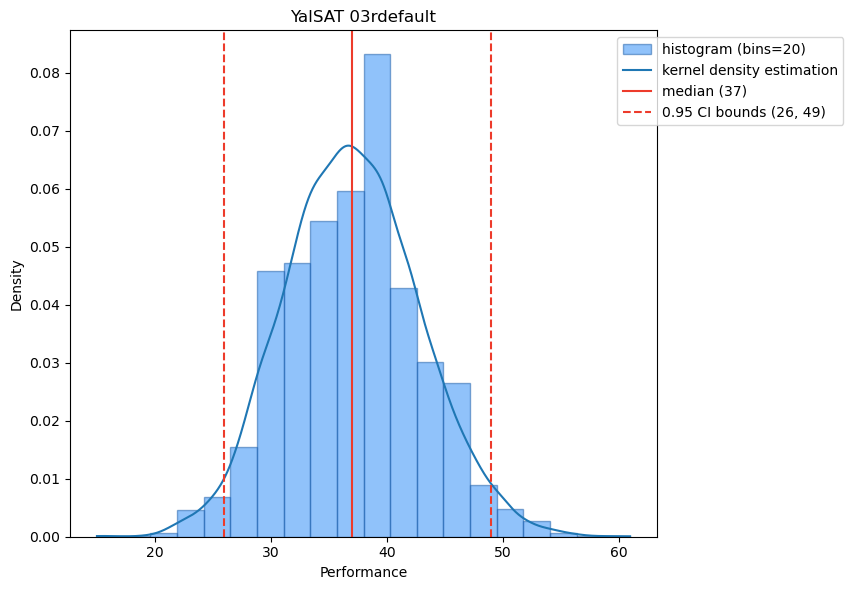

In [61]:
plot_distribution(comparison, "MapleCOMSPS_DRUPseq_LRB_VSIDS_drup")
plot_distribution(comparison, "YalSAT 03rdefault")

MapleCOMSPS_DRUPseq_LRB_VSIDS_drup vs Glucose_nbSatdefault: 0.0035


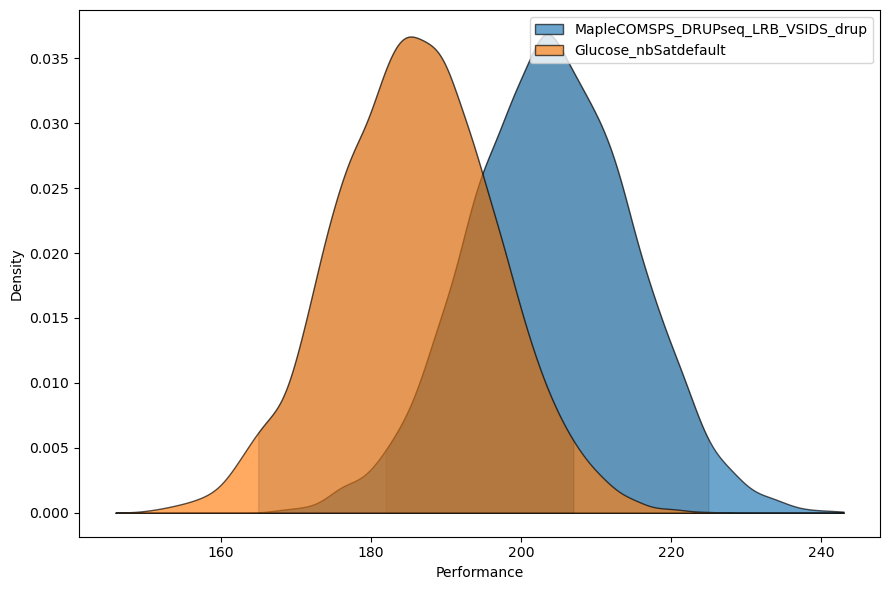

In [62]:
plot_distributions_comparison(comparison, ["MapleCOMSPS_DRUPseq_LRB_VSIDS_drup", "Glucose_nbSatdefault"])

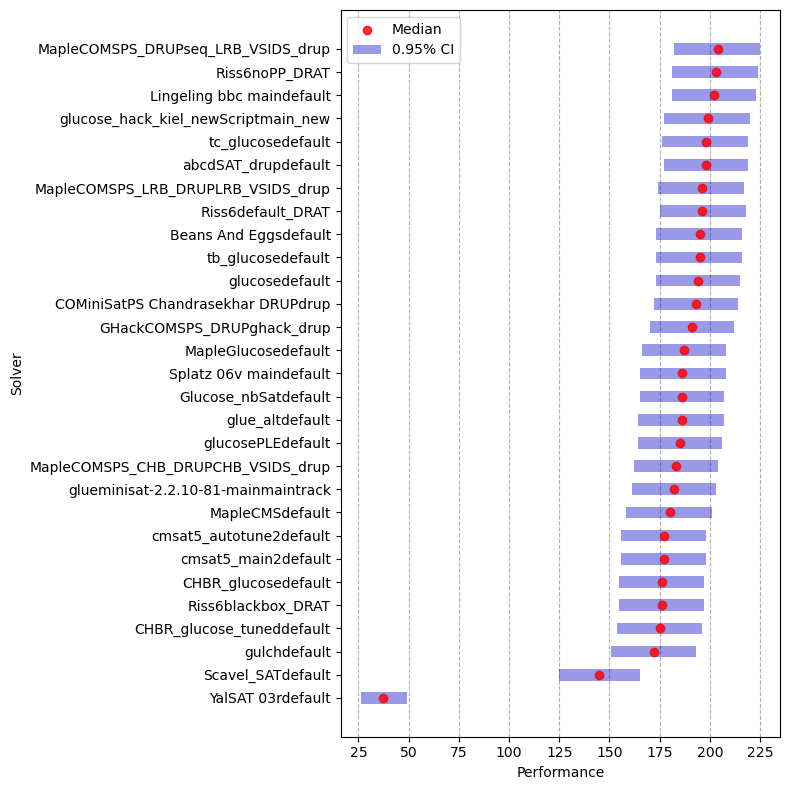

In [63]:
plot_ci_list(comparison)

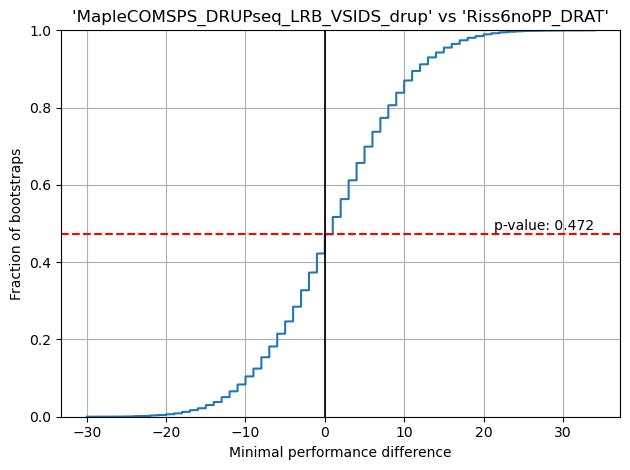

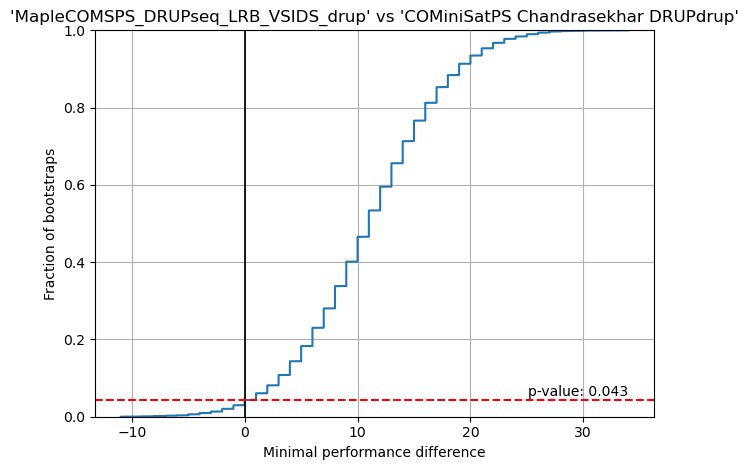

In [64]:
def plot_comparison_distribution(comparison, algorithms):
    cache = comparison._get_cache()
    s1 = cache["meta_data"]["algorithms"].index(algorithms[0])
    s2 = cache["meta_data"]["algorithms"].index(algorithms[1])

    distributions = cache["distributions"]
    p_value = comparison.statistical_test(*algorithms)
    direction = -1 if comparison.minimise else 1
    diff = direction * (distributions[s1,:] - distributions[s2,:])
    diff = np.sort(diff)
    plt.grid()
    plt.plot(diff, np.linspace(0, 1, len(diff)))
    plt.axvline(0, c="black", linewidth=1.25, linestyle="-")
    plt.axhline(p_value, c="red", linestyle="--")
    plt.text(diff.max() , p_value+0.01, f"p-value: {p_value:.3f}", ha="right")
    plt.title(f"'{algorithms[0]}' vs '{algorithms[1]}'")
    plt.xlabel("Minimal performance difference")
    plt.ylabel("Fraction of bootstraps")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


plot_comparison_distribution(comparison, ["MapleCOMSPS_DRUPseq_LRB_VSIDS_drup", "Riss6noPP_DRAT"])
plot_comparison_distribution(comparison, ["MapleCOMSPS_DRUPseq_LRB_VSIDS_drup", "COMiniSatPS Chandrasekhar DRUPdrup"])

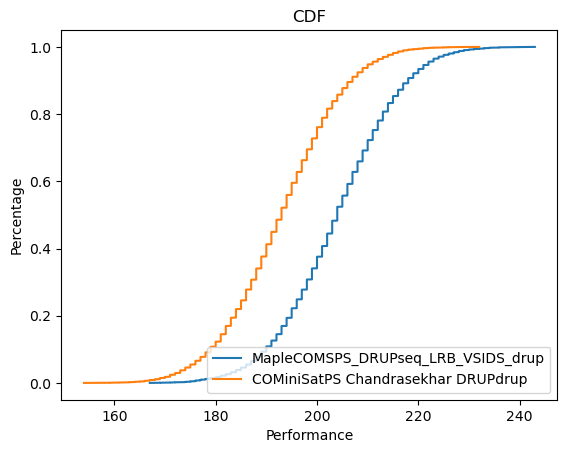

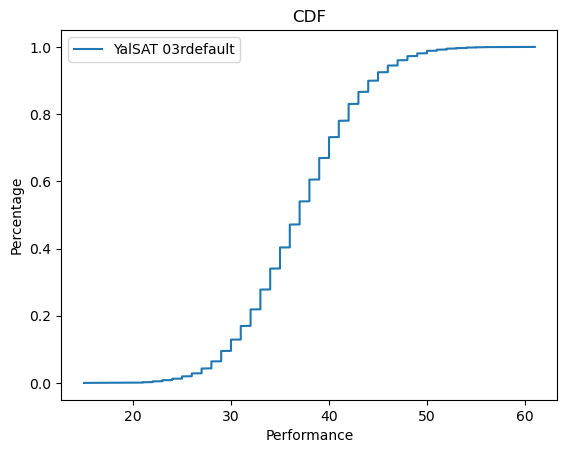

In [65]:
def plot_distribution_cdf(comparison, algorithms):
    cache = comparison._get_cache()
    distributions = cache["distributions"]

    if not isinstance(algorithms, list):
        algorithms = [algorithms]

    for algorithm in algorithms:
        s1 = cache["meta_data"]["algorithms"].index(algorithm)

        #direction = -1 if comparison.minimise else 1
        diff = distributions[s1,:]
        diff = np.sort(diff)
        plt.plot(diff, np.linspace(0, 1, len(diff)), label=algorithm)

    # plt.axhline(0, c="black", linewidth=1.25, linestyle="-")
    # plt.axvline(p_value, c="red", linestyle="--")
    # plt.text(p_value+0.01, diff.max(), f"p-value = {p_value:.3%}")
    plt.title("CDF")
    plt.xlabel("Performance")
    plt.ylabel("Percentage")
    plt.legend()
    plt.show()

plot_distribution_cdf(comparison, ["MapleCOMSPS_DRUPseq_LRB_VSIDS_drup", "COMiniSatPS Chandrasekhar DRUPdrup"])
plot_distribution_cdf(comparison, ["YalSAT 03rdefault"])

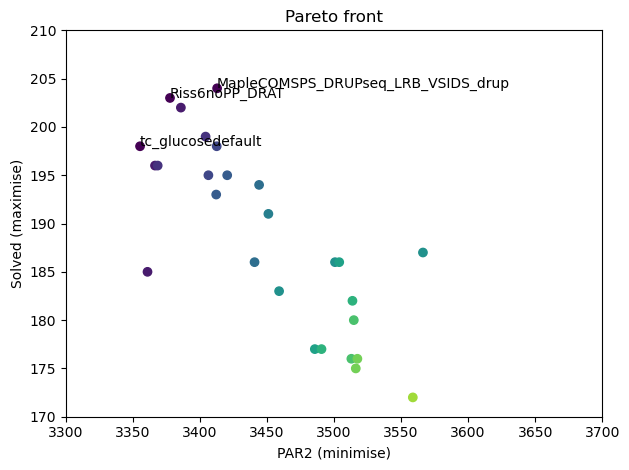

In [67]:
ddf = default_comparison.get_ranking().sort_values(("PAR2", "rank"))
points = ddf[[("PAR2", "score"), ("solved", "score")]].to_numpy()
points[:, 1] = -points[:, 1]
ranks, dl, dc, ndr = pygmo.fast_non_dominated_sorting(points)
ndr
plt.scatter(ddf[("PAR2","score")], ddf[("solved","score")], c=ndr)
for algindex in np.argwhere(ndr == 0):
    iloc = algindex[0]
    series = ddf.iloc[iloc]
    # print(series.name)
    # print(series[("PAR2","score")], series[("solved","score")], series.name)
    plt.text(series[("PAR2","score")], series[("solved","score")], series.name)
plt.title("Pareto front")
plt.xlim(3300, 3700)
plt.xlabel("PAR2 (minimise)")
plt.ylim(170, 210)
plt.ylabel("Solved (maximise)")
plt.tight_layout()
plt.show()